<a href="https://colab.research.google.com/github/eugenie-kim012/Daily-Log/blob/main/12th_May_2025_%EC%82%B0%ED%83%84%EB%8D%B0%EB%A5%B4_%EA%B3%A0%EA%B0%9D_%EB%A7%8C%EC%A1%B1_%EC%98%88%EC%B8%A1_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%2B_%EA%B5%90%EA%B3%BC%EC%84%9C_%EB%9F%AC%EC%8B%A0%EB%A8%B8%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import files
uploaded = files.upload()

Saving train_santander.csv to train_santander (1).csv


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1')
# encoding='latin-1'은 문자 인코딩 형식입니다. 이 파일이 UTF-8이 아닌 Latin-1 (ISO-8859-1) 형식으로 저장돼 있기 때문에 이 옵션을 줬습니다. (영어권, 유럽 데이터를 다룰 때 종종 사용됩니다.)print('dataset shape:', cust_df.shape)
cust_df.head(3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


## 데이터 전처리

In [38]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


## 만족과 불만족의 비율을 알아보기

In [39]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied  비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

#unsatisfied의 비율은 많이 높지 않음

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied  비율은 0.04


In [40]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


## 각 row은 소님이고 coloum은 항목임. 그러나 개인 정보 문제로 row 그리고 항목 모두 현재 암호화 되어 있는 상태임.

#컬럼명에 포함된 키워드는 어느 정도 추측이 가능해요:

접두사	의미 (추정)
* var	변수 (Variable) 번호
* imp_	금액(Amount) 관련
* saldo_	잔고(Balance)
* num_	횟수(Count)
* ult1, ult3	최근 1개월, 최근 3개월 (ultimo=last)
* comer	상업 활동 관련 (comercial)
* efect	현금 관련 (efectivo)

# 일단  책 필사


In [41]:
cust_df['var3'].replace(-999999,2,inplace=True)
cust_df.drop('ID', axis=1, inplace=True)


# 이 줄은 var3에서 -999999 값을 2로 대체. inplace=True를 사용하면 원본 cust_df에 바로 적용.
#axis = 1, 해당 열을 삭제하겠다는 말 (inplace=True로 바로 적용, 해당 dataset에서 ID를 삭제하였음)

#피처 세트와 레이블 세트를 분리, 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_feactures = cust_df.iloc[:, :-1] #마지막 컬럼을 제외한 모든 열(피처들) 을 선택
y_labels = cust_df.iloc[:, -1] #마지막 열, 즉 레이블(TARGET) 을 선택 (머신 러닝에서는 피쳐(입력 데이터)와 레이블 (정답 데이터)를 분리해야 하므로
print('피처 데이터 shape{0}'.format(X_feactures.shape)) #치퍼의 데이터 크기를 (행, 열)로 보여주기

피처 데이터 shape(76020, 369)


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feactures, y_labels,
                                                    test_size=0.2, random_state=0)

train_cnt = y_train.count()
#train data만 가지고 실습하기
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


# * 학습 데이터 그리고 테스트 데이터 모두 원본 데이터와 분포가 비슷함 (전체 데이터의 4% 정도가 불만족 데이터임)

In [43]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

## XGBOOST (Extra Gradient boost) 모델 학습과 하이퍼 파라미터 튜닝
* 학습 모델의 형성 및 예측 결과를 ROC AUC로 평가 (XGBClassifier의 eval_metric은 'auc'로 - 그러나 이 경우 logloss로 해도 큰 차이는 없을 것)
* XGBCLASSIFIER를 기반으로 학습을 수행
* n_estimator는 500으로 설정하되, early_stopping_rounds를 100 으로 설정
* 앞에서 분리한 학습 데이터와 검증 데이터 세트를 이용, eval_set=[(X_tr, y_tr), (X_val, y_val)], 조기 중단은 100회로 설정
* 학습을 진행한 이후, 테스트 데이터 세트로 평가된 ROC-AUC 값을 확인

## https://m.blog.naver.com/snowstormaw/223219753823

---

GBM 파라미터와 비슷한 구조를 가짐

* 일반 파라미터 - 일반적으로 실행 시 스레드 수나 silent 모드 등을 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 없음

- booster: gbtree (디폴트) or gblinear
- silent: 0 이 디폴트, 출력 메시지를 나타내지 않고 싶을 경우에는 1로 설정
- nthread: CPU의 실행 스레드 개수를 조정 (드폴트 - 전체 스레드를 모두 사용)

* 부스트 파라미터 - 트리 최적화, 부스팅, regularisation 등과 관련 파라미커 등을 지칭
- eta(default=0.3, alias:learning_rate]; 디폴트는 0.1, 보통 0.01 ~0.2 선호
- num_boost_rounds
- min_child_weight[default=1]; 트리에서 추가적으로 가지를 나눌지 결정하기 위함. min_child_weight이 클수록 분할을 자제함 (과적합을 조절하기 위함)
- max_depth[default=6]; 0을 지정하면 깊이에 제한이 없는 것. 일반적으로 0.5에서 1 사이.
- colsample_bytree[default=1]; 트리 생성에 필요한 피쳐(칼럼)을 임의로 샘플링 하는데 사용. 피쳐가 많을 경우에는 과적합을 조정하는데에 적용함.
-lamda[default=1, alias:reg_lamda]; L2 Regulation 값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음. 일반적인 과적합 방지, 계수를 줄이지만 모두 남김.
- alpha[default=1, alias:reg_alpha]; L1 Regulation 값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음.일부 계수를 완전히 제거하기도 함.

- 피처가 많고, 노이즈나 중요하지 않은 피처가 섞여 있을 때 → reg_alpha (L1) 사용
- 과적합이 우려될 때 일반적으로 → reg_lambda (L2)
- 두 개를 같이 조절하면서 교차 검증으로 가장 좋은 조합을 찾는 게 일반적입니다.

- scale_pos_weight[default=1]: 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터.


* 학습 태스크 파라미터 - 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터
- objective; 최솟값을 가져야 할 손실 함수를 정의.
- binary:logic; 이진 분류일 때 적용
- Multi:softmax: 다중 분류일 때 사용. 손실 함수가 Multi:softmax일 경우, 레이블 클래스의 개수인 Num_class 파라미터 정하기
- multi_softprob
_ eval_metrix

과적합 문제가 심각하다면 고려해야 할 것
_ eta값 낮추기 (num_round 올리기)
_ max depth 낮추기
_ min_child_weight값 높이기
_gamma 값 높이기


In [44]:
!pip install -U xgboost


In [45]:
import xgboost
print(xgboost.__version__)


2.1.4


In [48]:
import xgboost
print(xgboost.__version__)


2.1.4


In [49]:
!pip install --upgrade xgboost


In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156, early_stopping_rounds=100, eval_metric='auc')
xgb_clf.fit(X_tr, y_tr,
            eval_set=[(X_tr, y_tr), (X_val, y_val)],
            verbose=False)

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))


ROC AUC: 0.8417


In [54]:
from hyperopt import hp

#max_depth 는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1 간격으로
#colsample_bytree는 0.5에서 0.95 사이, Learning rate는 0.01dptj 0.2사이 정규 분포된 값으로 검색
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)}

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold


#fmin()에서 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 -1*roc_auc 평균 값을 반환

def objective_func(search_space):
  xgb_clf = XGBClassifier(n_estimators=100,
                          max_depth=int(search_space['max_depth']),
                          min_child_weight=int(search_space['min_child_weight']),
                          colsample_bytree=search_space['colsample_bytree'],
                          learning_rate=search_space['learning_rate'])

  #3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
  roc_auc_list = []
  #3개 k-fold 방식 적용
  kf = KFold(n_splits=3)
  #X_train을 다시 학습과 검증용 데이터로 분리
  for tr_index, val_index in kf.split(X_train):
    #kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
    X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
    X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

    #early stopping 값을 30회로 설정하고 추출된 학습과 검증 데이터로 XGBclassifier 수행
    xgb_clf.fit(X_tr, y_tr,
            eval_set=[(X_tr, y_tr), (X_val, y_val)],
            verbose=False)

    #1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산 위해 list에 결괏값 담음
    score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
    roc_auc_list.append(score)

    #3개 k-fold로 계산된 roc auc 값의 평균값을 반환하되
    # Hyper0pt는 목적 함수의 최솟값을 위한 입력값을 찾으므로 -1를 곱한 뒤 반환
    return -1 * np.mean(roc_auc_list)



In [62]:
from hyperopt import fmin, tpe, Trials

trials = Trials()
#fmin() 함수를 호출, max_evals 지정된 횟수만큼 반복 후 목적함수의 회솟값을 가지는 최적 입력값 추출,

best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, #최대 반복 횟수를 지정합니다
            trials=trials, rstate=np.random.default_rng(seed=30))
print('best:', best)

100%|██████████| 50/50 [15:41<00:00, 18.83s/trial, best loss: -0.8349204334866185]
best: {'colsample_bytree': np.float64(0.726055968457679), 'learning_rate': np.float64(0.051232879371870446), 'max_depth': np.float64(5.0), 'min_child_weight': np.float64(6.0)}


In [65]:
#n_estimators를 500 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']),
                        min_child_weight=int(best['min_child_weight']),
                        colsample_bytree=round(best['colsample_bytree'], 5))

#evaluation metric를 auc로, early stopping은 100로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr,
            eval_set=[(X_tr, y_tr), (X_val, y_val)],
            verbose=False)

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.8420


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

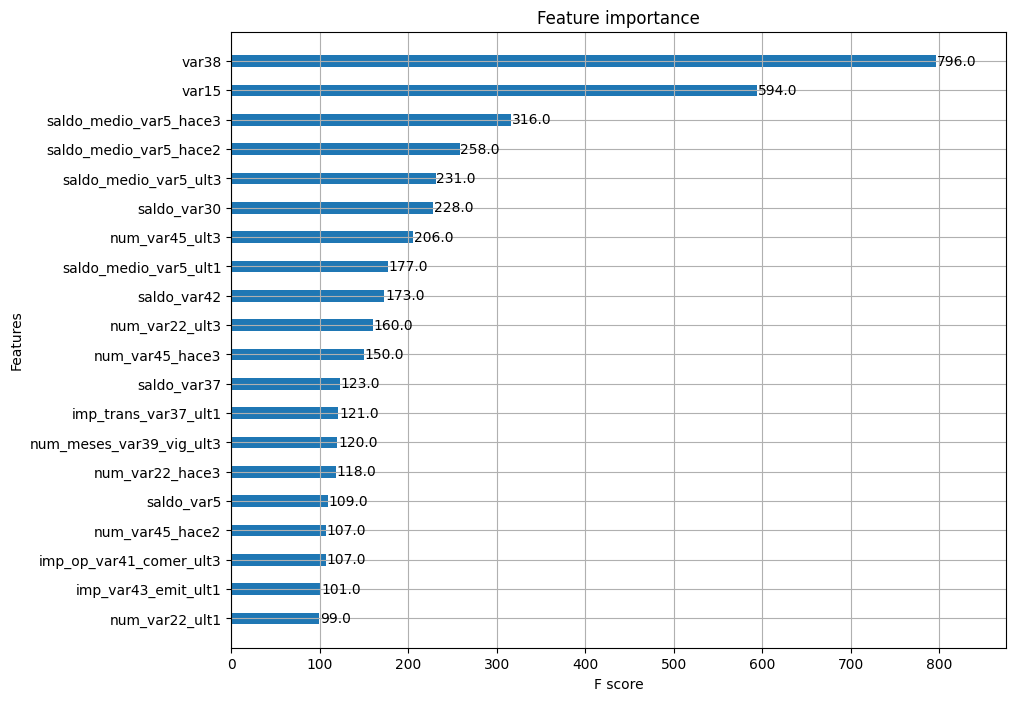

In [68]:
from ast import increment_lineno
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [77]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, eval_metric='auc', eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13308
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 242
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
ROC AUC: 0.8134


In [103]:
lgbm_search_space = {'num_leaves':hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth':hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples':hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample':hp.uniform('subsample', 0.7, 1),
                     'learning_rate':hp.uniform('learning_rate', 0.01, 0.2)
                     }

In [114]:
from lightgbm import LGBMClassifier
from lightgbm.callback import early_stopping
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np

def objective_func(search_space):
    lgbm_clf = LGBMClassifier(
        n_estimators=100,
        num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate']
    )

    roc_auc_list = []
    kf = KFold(n_splits=3, shuffle=True, random_state=42)

    for tr_index, val_index in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # ✅ 조기 중단 설정
        lgbm_clf.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            eval_metric='auc',
            callbacks=[early_stopping(stopping_rounds=30)]
        )

        # ✅ 예측 및 평가
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    # ✅ 평균 AUC의 음수 반환 (hyperopt는 loss 최소화)
    return -1 * np.mean(roc_auc_list)


In [115]:
from hyperopt import fmin, tpe, Trials
trials = Trials()


#fmin()함수를 호출, max_evals 지정된 횟수만큼 반복 후 목적함수의 회솟값을 가지는 최적 입력값을 추출

best = fmin(fn=objective_func,
            space=lgbm_search_space,
            algo=tpe.suggest,
            max_evals=50, #최대 반복 횟수를 지정합니다
            trials=trials, rstate=np.random.default_rng(seed=30))


print('best:', best)

[LightGBM] [Info] Number of positive: 1601, number of negative: 38943
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12868
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039488 -> initscore=-3.191471
[LightGBM] [Info] Start training from score -3.191471
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.835597	valid_0's binary_logloss: 0.132257
[LightGBM] [Info] Number of positive: 1586, number of negative: 38958
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you ca

In [118]:
lgbm_clf=LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                        max_depth=int(best['max_depth']),
                        min_child_samples=int(best['min_child_samples']),
                        subsample=round(best['subsample'], 5),
                        learning_rate=round(best['learning_rate'], 5))

#evaluation metric을 auc로, early stopping 은 100로 설정하고 학습 수행


# ✅ 조기 중단은 callbacks 로 지정
lgbm_clf.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    callbacks=[early_stopping(stopping_rounds=100)]
)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12898
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[69]	valid_0's binary_logloss: 0.134718
ROC AUC: 0.8424


In [119]:
from lightgbm import LGBMClassifier
from lightgbm.callback import early_stopping
from sklearn.metrics import roc_auc_score

# Hyperopt 결과로부터 최종 하이퍼파라미터 추출
final_params = {
    'n_estimators': 500,  # 충분히 크게 설정하고 조기 종료로 최적 지점 찾기
    'num_leaves': int(best['num_leaves']),
    'max_depth': int(best['max_depth']),
    'min_child_samples': int(best['min_child_samples']),
    'subsample': round(best['subsample'], 5),
    'learning_rate': round(best['learning_rate'], 5),
    'eval_metric': 'auc'  # 모델 생성 시에 넣어도 됨
}

# 모델 정의
lgbm_clf = LGBMClassifier(**final_params)

# 학습 수행 (조기 종료 포함)
lgbm_clf.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    callbacks=[early_stopping(stopping_rounds=100)]
)

# 테스트셋 ROC AUC 평가
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('✅ ROC AUC on Test Set: {0:.4f}'.format(lgbm_roc_score))

# 최종 파라미터 및 best_iteration 출력
print("\n📌 최적 하이퍼파라미터:")
for k, v in final_params.items():
    print(f"{k}: {v}")
print(f"\n🌟 Best iteration: {lgbm_clf.best_iteration_}")


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.150648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12898
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 192
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[69]	valid_0's binary_logloss: 0.134718
[LightGBM] [Warning] Unknown parameter: eval_metric
✅ ROC AUC on Test Set: 0.8424

📌 최적 하이퍼파라미터:
n_estimators: 500
num_leaves: 35
max_depth: 116
min_child_samples: 98
subsample: 0.95535
learning_rate: 0.05053
eva